In [168]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import stats
from scipy.stats import sem
import math

In [13]:
import pandas as pd
data= pd.read_csv("spotify.csv")
data.head()


#data["energy"].sum()
data["popularity"].sum()

7967

In [59]:
data.dtypes

title               object
artist              object
top genre           object
year                 int64
beats.per.minute     int64
energy               int64
danceability         int64
loudness.dB          int64
liveness             int64
valance              int64
length               int64
acousticness         int64
speechiness          int64
popularity           int64
dtype: object

In [60]:
data.describe()

,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,2015.960000,116.970000,62.680000,66.96000,-6.100000,16.860000,49.970000,214.530000,24.95000,9.930000,79.670000
std,5.327497,27.470629,16.491737,13.60401,1.987334,12.972403,21.737857,35.934974,26.27876,9.424077,5.905065
min,1975.000000,71.000000,11.000000,35.00000,-14.000000,3.000000,6.000000,119.000000,0.00000,2.000000,53.000000
25%,2015.000000,95.000000,52.000000,59.00000,-7.000000,10.000000,33.750000,190.500000,4.00000,4.000000,79.000000
50%,2017.000000,115.000000,64.500000,69.00000,-6.000000,12.000000,48.000000,210.000000,13.00000,6.000000,81.000000
75%,2018.000000,135.250000,76.000000,77.00000,-5.000000,17.250000,66.000000,234.250000,41.50000,11.000000,83.000000
max,2021.000000,186.000000,92.000000,91.00000,-3.000000,79.000000,93.000000,354.000000,98.00000,46.000000,91.000000


NameError: name 'pd' is not defined

In [63]:
data.isna().sum().sum()

0

In [64]:
dataset["energy"].median()

64.5

In [65]:
def variance(data):
     # Number of observations
     n = len(data)
     # Mean of the data
     mean = sum(data) / n
     # Square deviations
     deviations = [(x - mean) ** 2 for x in data]
     # Variance
     variance = sum(deviations) / n
     return variance

In [201]:
variance(data["energy"])

269.25759999999997

In [68]:
def stdev(data):
     var = variance(data)
     std_dev = math.sqrt(var)
     return std_dev

In [202]:
stdev(data["energy"])

16.409070662289196

In [15]:
data["valance"].sum()

4997

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='energy', ylabel='Density'>

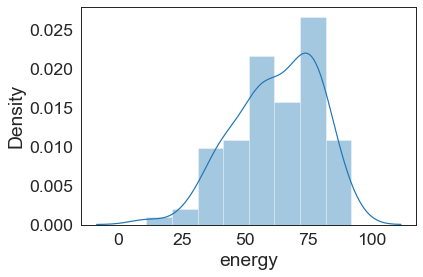

In [80]:
sns.distplot(data["energy"])

In [99]:
sorted(dataset)

['acousticness',
 'artist',
 'beats.per.minute',
 'danceability',
 'energy',
 'length',
 'liveness',
 'loudness.dB',
 'popularity',
 'speechiness',
 'title',
 'top genre',
 'valance',
 'year']

In [103]:
q1, q3= np.percentile(dataset["energy"],[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

In [105]:
print("lower",lower_bound,"upper",upper_bound,"Outside this data range is outliers")

lower 16.0 upper 112.0 Outside this data range is outliers


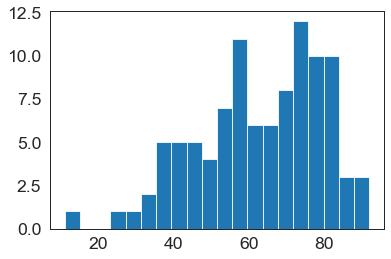

In [203]:
plt.hist(data["energy"],bins=20)
plt.show()

<AxesSubplot:title={'center':'energy'}, xlabel='year'>

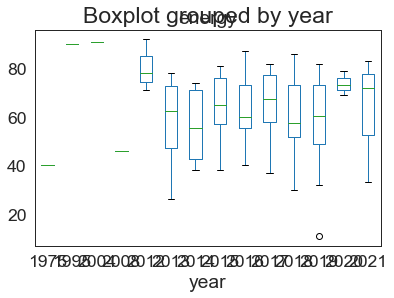

In [119]:
data.boxplot(by ="year", column =['energy'], grid = False)

In [192]:
# create 99% confidence interval
#st.t.interval(alpha=0.05,
 #             df=len(data["energy"])-1,
  #            loc=np.mean(data["energy"]), 
   #           scale=st.sem(data["energy"]))

In [204]:
def confidenceInterval(data):
  n=len(data["energy"])
  mean=np.mean(data["energy"])
  sem=stats.sem(data["energy"])
  z=stats.t.ppf((1+0.95)/2,n-1)
  h=sem*z
  
  return print("interval,",mean-h,"interval",mean+h)


In [205]:
#st.t.interval(alpha=0.05, df=len(data["energy"])-1, loc=np.mean(data["energy"]), scale=st.sem(data["energy"])) 

In [206]:
print(confidenceInterval(data))

interval, 59.40768168196187 interval 65.95231831803812
None


In [207]:
def data_numbers_dependsto_error_margin(variance, err_units, significance_level):
    return (np.square(significance_level/2)*variance)/np.square(err_units)

In [208]:
print(data_numbers_dependsto_error_margin(variance=269.25759999999997,err_units=0.1,significance_level=0.10))


67.31439999999999
